# Decoding UPI Transactions: Behavioral & Adoption Trends 2024

---

## This project conducts an in-depth analysis of 2.5 lakh UPI transactions from 2024 to uncover user behaviour patterns, transaction dynamics (P2P vs P2M), peak usage periods, and bank-wise adoption trends. which factors influence users to complete or abandon transactions? Why do certain banks or user segments exhibit higher engagement? 
## By exploring these questions, actionable insights are drived to help digital payment platforms enhance user experience, optimize transaction completion, and drive greater adoption across diverse user segments.

In [1]:
## Data handling
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

# Dataset Overview:
### This dataset simulates realistic Unified Payments Interface (UPI) transactions across various merchant categories in India. It is designed to reflect real-world digital payment patterns, including temporal, demographic, and behavioral features relevant for fraud detection, consumer analytics, and business intelligence.
### Dataset Source: Kaggle / Public dataset 
### Dataset link: https://www.kaggle.com/datasets/skullagos5246/upi-transactions-2024-dataset
### Total Records: 2,50,000
### Columns: 17
### Key features: Transaction Type, Merchant Category, Amount (INR), Transaction Status, Age groups, Banks, Hour of day, is weekend, and **upi app** I added it into dataset manually.

In [2]:
df = pd.read_csv('upi_transactions_2024.csv')

In [3]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,08-10-2024 15:17,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,11-04-2024 06:56,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,02-04-2024 13:27,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,07-01-2024 10:09,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,23-01-2024 19:04,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [4]:
df.shape

(250000, 17)

In [5]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [7]:
df.describe()

,amount (INR),fraud_flag,hour_of_day,is_weekend
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,1311.756036,0.001920,14.681032,0.285348
std,1848.059224,0.043776,5.188304,0.451581
min,10.000000,0.000000,0.000000,0.000000
25%,288.000000,0.000000,11.000000,0.000000
50%,629.000000,0.000000,15.000000,0.000000
75%,1596.000000,0.000000,19.000000,1.000000
max,42099.000000,1.000000,23.000000,1.000000


In [8]:
df.isnull().sum()

transaction id        0
timestamp             0
transaction type      0
merchant_category     0
amount (INR)          0
transaction_status    0
sender_age_group      0
receiver_age_group    0
sender_state          0
sender_bank           0
receiver_bank         0
device_type           0
network_type          0
fraud_flag            0
hour_of_day           0
day_of_week           0
is_weekend            0
dtype: int64

In [9]:
## checking unique values

for col in df.columns:
    print(col, ':', df[col].nunique())

transaction id : 250000
timestamp : 183932
transaction type : 4
merchant_category : 10
amount (INR) : 10355
transaction_status : 2
sender_age_group : 5
receiver_age_group : 5
sender_state : 10
sender_bank : 8
receiver_bank : 8
device_type : 3
network_type : 4
fraud_flag : 2
hour_of_day : 24
day_of_week : 7
is_weekend : 2


---

# Data Cleaning and Preposition

### Checking Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

### Data Standardization

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [12]:
df.fraud_flag.unique()

array([0, 1])

In [13]:
## stripping whitespace from string columns

for col in df.select_dtypes(include= 'object').columns:
    df[col] = df[col].str.strip()

In [14]:
df['timestamp'] = df['timestamp'].astype(str).str.strip()

In [15]:
## Converting timestamp to datetime

df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [16]:
df.head(2)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,NaT,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,NaT,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0


In [17]:
df['transaction_status'].unique()

array(['SUCCESS', 'FAILED'], dtype=object)

In [18]:
df['day_of_week'].unique()

array(['Tuesday', 'Thursday', 'Sunday', 'Monday', 'Saturday', 'Wednesday',
       'Friday'], dtype=object)

In [19]:
df['fraud_flag'].unique()

array([0, 1])

In [20]:
df['is_weekend'].unique()

array([0, 1])

In [21]:
df['sender_bank'].unique()

array(['Axis', 'ICICI', 'Yes Bank', 'IndusInd', 'HDFC', 'Kotak', 'SBI',
       'PNB'], dtype=object)

In [22]:
apps = ['PhonePe','Gpay','Paytm']

In [23]:
bank_app_map = {'Axis': 'PhonePe',
                'ICICI': 'GPay',
                'Yes Bank': 'Paytm',
                'IndusInd': 'PayPal',
                'HDFC': 'PhonePe',
                'Kotak': 'GPay',
                'SBI': 'Paytm',
                'PNB': 'PayPal'}

In [24]:
df['upi_app'] = df['sender_bank'].map(bank_app_map)

In [25]:
df['upi_app'].isnull().sum()

np.int64(0)

In [26]:
df['upi_app'].value_counts()

upi_app
Paytm      87553
PhonePe    62527
PayPal     50119
GPay       49801
Name: count, dtype: int64

In [27]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,upi_app
0,TXN0000000001,NaT,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,PhonePe
1,TXN0000000002,NaT,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,GPay
2,TXN0000000003,NaT,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,Paytm
3,TXN0000000004,NaT,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,GPay
4,TXN0000000005,NaT,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,PhonePe


### Removing Unnecessary Columns

In [28]:
df['timestamp'].isna().sum()

np.int64(250000)

In [29]:
df.isnull().sum()

transaction id             0
timestamp             250000
transaction type           0
merchant_category          0
amount (INR)               0
transaction_status         0
sender_age_group           0
receiver_age_group         0
sender_state               0
sender_bank                0
receiver_bank              0
device_type                0
network_type               0
fraud_flag                 0
hour_of_day                0
day_of_week                0
is_weekend                 0
upi_app                    0
dtype: int64

In [30]:
df.drop(columns = ['timestamp'], inplace = True)

In [31]:
df.head(2)

,transaction id,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,upi_app
0,TXN0000000001,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,PhonePe
1,TXN0000000002,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,GPay


In [32]:
df.drop(columns = ['transaction id'], inplace = True)

In [33]:
df.head(2)

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,GPay


---

# EDA with Pandas and Visualization

In [34]:
df.to_csv('upi_transactions_cleaned.csv', index = False)

In [35]:
status_counts = df['transaction_status'].value_counts()

In [36]:
status_counts

transaction_status
SUCCESS    237624
FAILED      12376
Name: count, dtype: int64

In [37]:
status_percentage = df['transaction_status'].value_counts(normalize = True) * 100

In [38]:
status_percentage

transaction_status
SUCCESS    95.0496
FAILED      4.9504
Name: proportion, dtype: float64

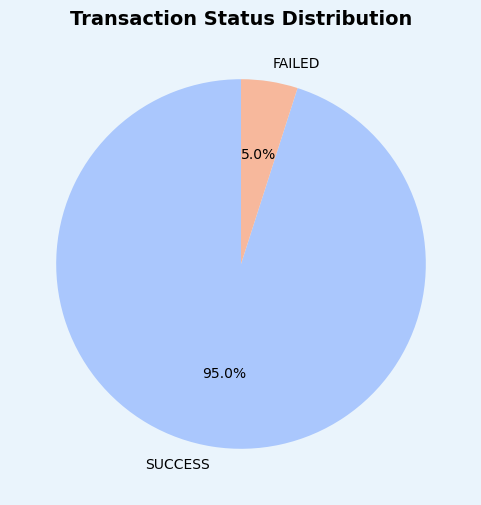

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

ax.pie(status_percentage, labels=status_percentage.index, autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette("coolwarm", len(status_percentage)))
ax.set_title('Transaction Status Distribution', fontsize=14, fontweight='bold', color='black')
plt.savefig('Transaction_Status_Distribution')

### Transactions are highly reliable, with 95% being successful. Only 5% failed, indicating overall system stability. However, even this small failure rate highlights areas like network reliability or device compatibility that could be optimized.

In [40]:
df['fraud_flag'].unique()

array([0, 1])

In [41]:
fraud_counts = df['fraud_flag'].value_counts()

In [42]:
fraud_counts

fraud_flag
0    249520
1       480
Name: count, dtype: int64

In [43]:
fraud_percentage = df['fraud_flag'].value_counts(normalize = True) * 100

In [44]:
fraud_percentage

fraud_flag
0    99.808
1     0.192
Name: proportion, dtype: float64

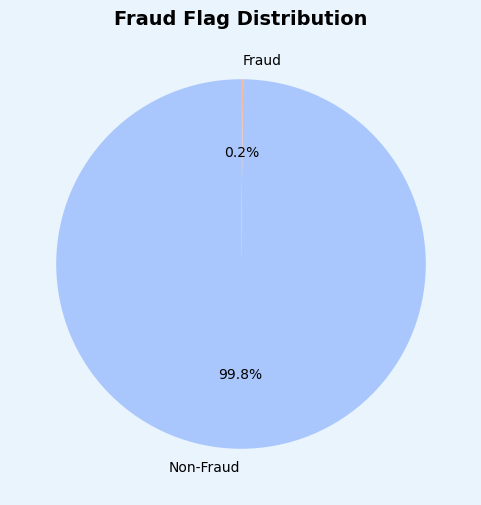

In [45]:
plt.figure(figsize=(6,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
plt.pie(fraud_percentage, labels=['Non-Fraud','Fraud'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("coolwarm", len(fraud_percentage)))
plt.title('Fraud Flag Distribution', fontsize=14, fontweight='bold', color='black')
plt.savefig('Fraud_Flag_Distribution')

### Fraudulent transactions account for only 0.2% of the total dataset, highlighting a highly imbalanced distribution. While this is encouraging from a security perspective, the extreme imbalance poses challenges for fraud detection, as even a small percentage can represent significant financial losses.

In [46]:
ct_status = pd.crosstab(df['transaction_status'], df['fraud_flag'])
ct_status

fraud_flag,0,1
transaction_status,,
FAILED,12355,21
SUCCESS,237165,459


<Figure size 400x400 with 0 Axes>

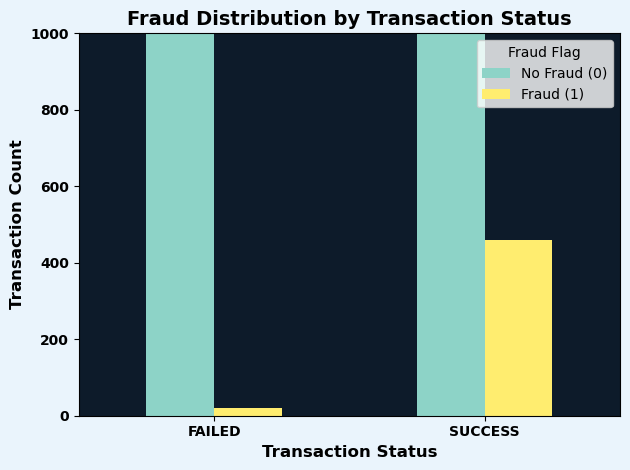

In [47]:
plt.figure(figsize=(4,4))
ct_status.plot(kind='bar', stacked=False, colormap='Set3')

plt.title("Fraud Distribution by Transaction Status", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Status", fontsize=12, fontweight='bold')
plt.ylabel("Transaction Count", fontsize=12, fontweight='bold')
plt.ylim(0, 1000)
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_Transaction_Status')

### The majority of fraudulent transactions were processed successfully, with over 450 cases slipping through undetected. Only a small fraction of fraud attempts failed, highlighting how easily fraudsters manage to exploit the system. This indicates a critical gap in fraud prevention at the transaction approval stage.

In [48]:
hour_counts = df['hour_of_day'].value_counts().sort_index()
hour_counts.head()

hour_of_day
0    3388
1    2244
2    1685
3    1314
4    1247
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_37012\861417953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm_r')


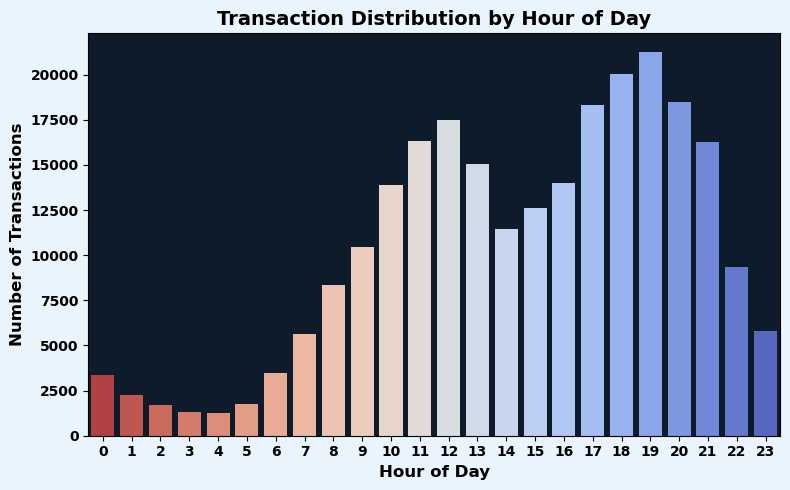

In [49]:
plt.figure(figsize=(8,5))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm_r')
plt.title("Transaction Distribution by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Transaction_Distribution_by_Hour_of_Day')

### Transaction activity peaks between 3 PM and midnight (15–24 hours), indicating that users are most active during late afternoons and evenings. This surge in transaction volume during specific hours may also present a higher window of risk for fraudulent activities.

In [50]:
df['hour_of_day'] = df['hour_of_day'] +1

In [51]:
fraud_by_hour = df.groupby("hour_of_day")["fraud_flag"].mean() * 100
fraud_by_hour = fraud_by_hour.reset_index()
fraud_by_hour.to_csv('fraud_by_hour_table', index = True)

In [52]:
fraud_by_hour.head()

,hour_of_day,fraud_flag
0,1,0.236128
1,2,0.267380
2,3,0.178042
3,4,0.304414
4,5,0.080192


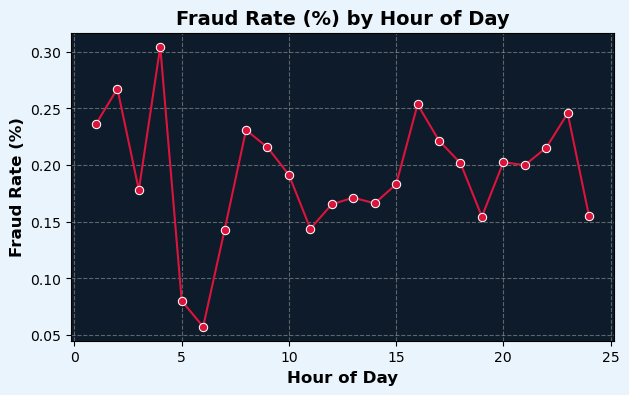

In [53]:
plt.figure(figsize=(7,4))
sns.lineplot(data=fraud_by_hour, x="hour_of_day", y="fraud_flag", marker="o", color="crimson")
plt.title("Fraud Rate (%) by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Fraud Rate (%)", fontsize=12, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.5)
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")
plt.savefig('Fraud_Rate_by_Hour_of_Day_pct')

### While overall transactions were spread across the day, the fraud rate spiked sharply at 4 AM. This unusual early-morning peak highlights a potential risk window when fraudulent activities are more likely to occur.

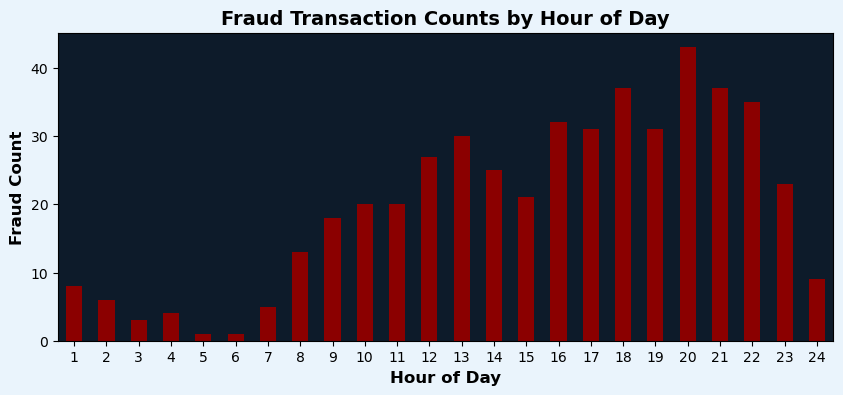

In [54]:
fraud_count_by_hour = df[df["fraud_flag"]==1]["hour_of_day"].value_counts().sort_index()

plt.figure(figsize=(10,4))
fraud_count_by_hour.plot(kind="bar", color="darkred")
plt.title("Fraud Transaction Counts by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Fraud Count", fontsize=12, fontweight='bold')
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")
plt.xticks(rotation=0)
plt.savefig('Fraud_Transaction_Counts_by_Hour_of_Day')

### Fraud attempts were minimal during the early morning hours. However, they surged sharply around 8 PM (20th hour) and remained consistently high throughout the afternoon and evening, signaling a clear time-of-day vulnerability.

In [55]:
ct_day = pd.crosstab(df['day_of_week'], df['fraud_flag'])
ct_day

fraud_flag,0,1
day_of_week,,
Friday,35435,61
Monday,36424,71
Saturday,35266,68
Sunday,35928,75
Thursday,35360,72
Tuesday,35482,58
Wednesday,35625,75


<Figure size 700x400 with 0 Axes>

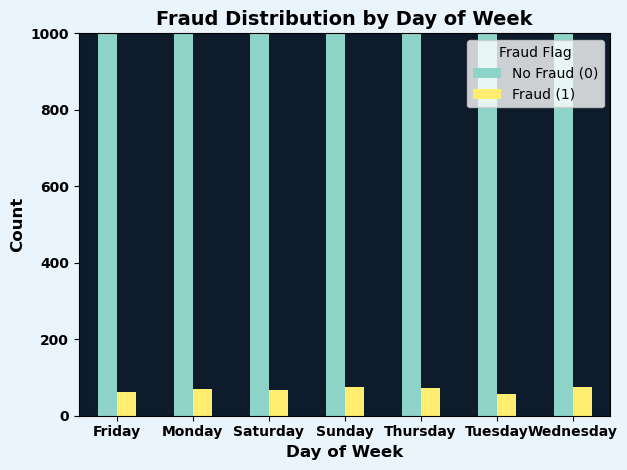

In [56]:
plt.figure(figsize=(7,4))
ct_day.plot(kind="bar", stacked=False, colormap="Set3")

plt.title("Fraud Distribution by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.ylim(0, 1000)
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.xticks(rotation=0, fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_Day_of_Week')

### Fraud attempts showed a fairly even distribution across all weekdays, with no single day standing out. This suggests that fraudulent activity is not tied to specific weekdays but persists consistently throughout the week.

In [57]:
weekend_counts = df['is_weekend'].value_counts()
weekend_counts

is_weekend
0    178663
1     71337
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_37012\2974277435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


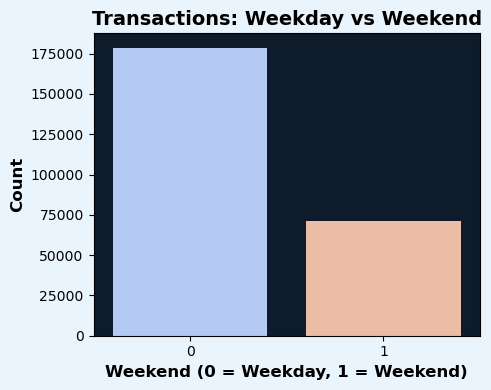

In [58]:
fig, ax = plt.subplots(figsize=(5,4))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

sns.barplot(
    x=weekend_counts.index,
    y=weekend_counts.values,
    palette="coolwarm",
    ax=ax
)
ax.set_title("Transactions: Weekday vs Weekend", fontsize=14, fontweight="bold")
ax.set_xlabel("Weekend (0 = Weekday, 1 = Weekend)", fontsize=12, fontweight="bold")
ax.set_ylabel("Count", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.savefig('Transactions_Weekday_vs_Weekend')

### Transaction volumes are noticeably lower on weekends compared to weekdays, highlighting a typical pattern of reduced UPI activity during weekends.

In [59]:
ct_weekend = pd.crosstab(df['is_weekend'], df['fraud_flag'])
ct_weekend

fraud_flag,0,1
is_weekend,,
0,178326,337
1,71194,143


<Figure size 200x200 with 0 Axes>

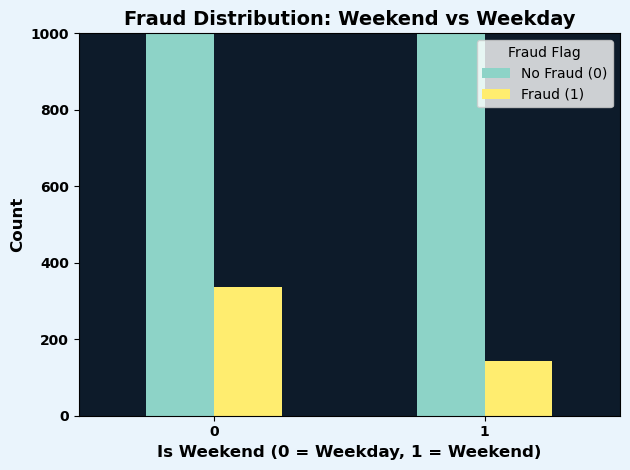

In [60]:
plt.figure(figsize=(2,2))
ct_weekend.plot(kind="bar", stacked=False, colormap="Set3")

plt.title("Fraud Distribution: Weekend vs Weekday", fontsize=14, fontweight="bold")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.ylim(0,1000)
plt.xticks(rotation=0, fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_is_Weekend')

### At first glance, weekdays seem to witness more frauds. However, adjusting for the number of days, weekends show a higher fraud rate per day, indicating that fraudulent activity is relatively more concentrated during weekends.

In [61]:
df['transaction type'].unique()

array(['P2P', 'P2M', 'Bill Payment', 'Recharge'], dtype=object)

In [62]:
type_counts = df['transaction type'].value_counts()

In [63]:
type_counts

transaction type
P2P             112445
P2M              87660
Bill Payment     37368
Recharge         12527
Name: count, dtype: int64

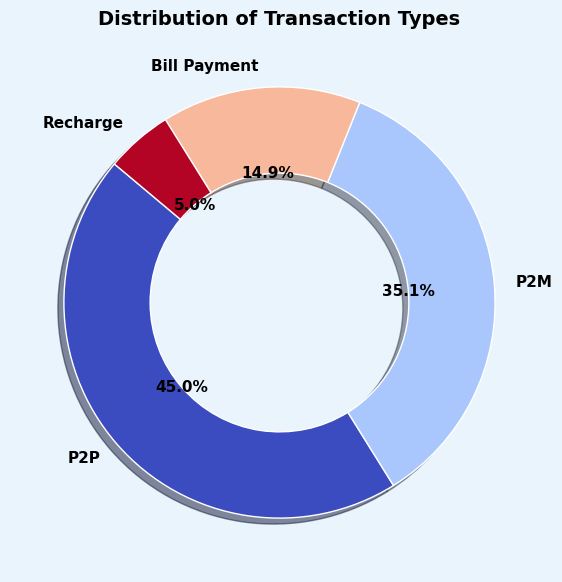

In [64]:
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(aspect="equal"))
ax.set_facecolor("#0d1b2a")  
fig.set_facecolor("#eaf4fc")  

wedges, texts, autotexts = ax.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,   
    colors=plt.cm.coolwarm(np.linspace(0,1,len(type_counts))),
    wedgeprops=dict(width=0.4, edgecolor='w')
)

plt.setp(autotexts, size=11, weight="bold")
plt.setp(texts, size=11, weight="bold")

plt.title("Distribution of Transaction Types", fontsize=14, fontweight="bold")
plt.savefig('Distribution_of_Transaction_Types')

### The UPI ecosystem is largely driven by peer-to-peer (P2P) transfers, highlighting how users predominantly rely on UPI for sending money to friends, family, and acquaintances. In contrast, recharge transactions remain minimal, suggesting that utility and prepaid payments are still a smaller fraction of overall UPI activity.

In [65]:
df['sender_state'].unique()

array(['Delhi', 'Uttar Pradesh', 'Karnataka', 'Telangana', 'Maharashtra',
       'Gujarat', 'Rajasthan', 'Tamil Nadu', 'West Bengal',
       'Andhra Pradesh'], dtype=object)

In [66]:
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
ct_day = ct_day.reindex(days_order)

In [67]:
ct_type_fraud = pd.crosstab(df['transaction type'], df['fraud_flag'])
ct_type_fraud.to_csv('transaction_type_fraud_table.csv', index = True)
ct_type_fraud

fraud_flag,0,1
transaction type,,
Bill Payment,37291,77
P2M,87493,167
P2P,112239,206
Recharge,12497,30


<Figure size 500x400 with 0 Axes>

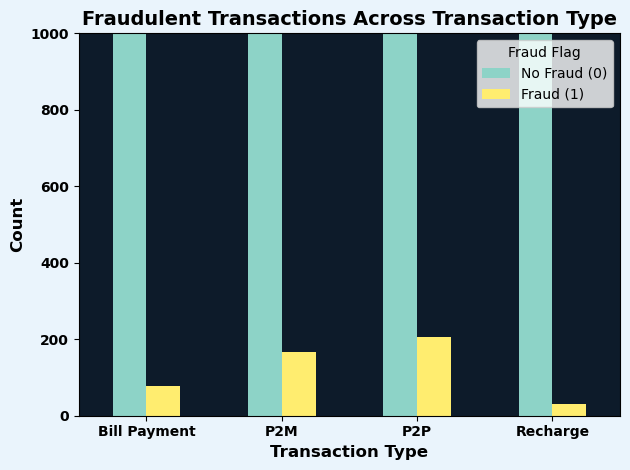

In [68]:
plt.figure(figsize=(5,4))
ct_type_fraud.plot(kind='bar', stacked=False, colormap='Set3')
plt.title("Fraudulent Transactions Across Transaction Type", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Type", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.legend(title="Fraud Flag", labels=['No Fraud (0)','Fraud (1)'])
plt.xticks(rotation = 360, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.ylim(0, 1000)  
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")
plt.tight_layout()
plt.savefig("transaction_type_fraud", dpi=300, bbox_inches='tight')

### Most fraudulent activity clusters around peer-to-peer (P2P) transactions, revealing the hidden risks of direct money transfers. Meanwhile, recharge transactions remain relatively safe, showing minimal fraud in this category—an important signal for prioritizing fraud monitoring.

In [69]:
# Fraud rate per transaction type
fraud_rate = df.groupby("transaction type")["fraud_flag"].mean() * 100
fraud_rate

transaction type
Bill Payment    0.206059
P2M             0.190509
P2P             0.183201
Recharge        0.239483
Name: fraud_flag, dtype: float64

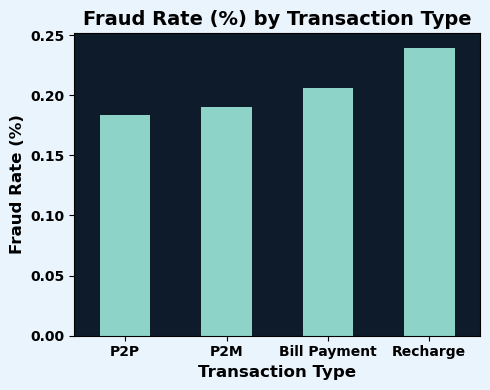

In [70]:
plt.figure(figsize=(5,4))
fraud_rate.sort_values().plot(kind="bar", colormap="Set3")

plt.title("Fraud Rate (%) by Transaction Type", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Type", fontsize=12, fontweight="bold")
plt.ylabel("Fraud Rate (%)", fontsize=12, fontweight="bold")

plt.xticks(rotation=0, fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Rate_pct_by_Transaction_Type')

### Although peer-to-peer (P2P) transactions account for the highest number of fraud cases, recharge transactions surprisingly have the highest fraud rate percentage. This highlights that while P2P is more frequently targeted, recharge transactions are riskier on a per-transaction basis and warrant focused monitoring.

In [71]:
df['merchant_category'].unique()

array(['Entertainment', 'Grocery', 'Fuel', 'Shopping', 'Food', 'Other',
       'Utilities', 'Transport', 'Healthcare', 'Education'], dtype=object)

In [72]:
merchant_counts = df['merchant_category'].value_counts()

In [73]:
merchant_counts

merchant_category
Grocery          49966
Food             37464
Shopping         29872
Fuel             25063
Other            24828
Utilities        22338
Transport        20105
Entertainment    20103
Healthcare       12663
Education         7598
Name: count, dtype: int64

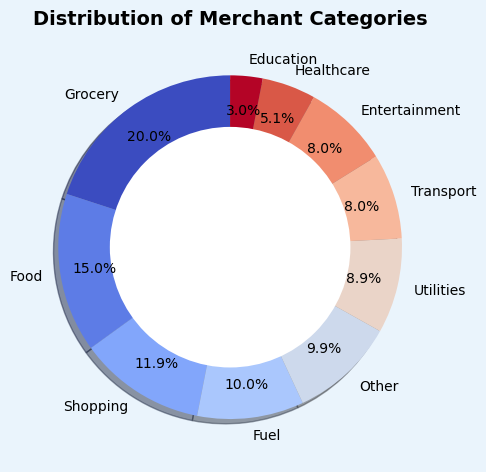

In [74]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

wedges, texts, autotexts = ax.pie(
    merchant_counts,
    labels = merchant_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    colors = plt.cm.coolwarm(np.linspace(0,1,len(merchant_counts))),
    shadow=True
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

plt.title("Distribution of Merchant Categories", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig('Distribution_of_Merchant_Categories')

### The majority of UPI transactions are concentrated in the Grocery and Food categories, highlighting routine daily spending habits. In contrast, the Education category sees minimal transaction activity, reflecting its relatively lower frequency in everyday financial interactions.

In [75]:
ct_merchant_fraud = pd.crosstab(df['merchant_category'], df['fraud_flag'])
ct_merchant_fraud.to_csv('merchant_category_fraud_table.csv', index = True)
ct_merchant_fraud

fraud_flag,0,1
merchant_category,,
Education,7582,16
Entertainment,20063,40
Food,37391,73
Fuel,25015,48
Grocery,49872,94
Healthcare,12642,21
Other,24778,50
Shopping,29810,62
Transport,20062,43


<Figure size 800x500 with 0 Axes>

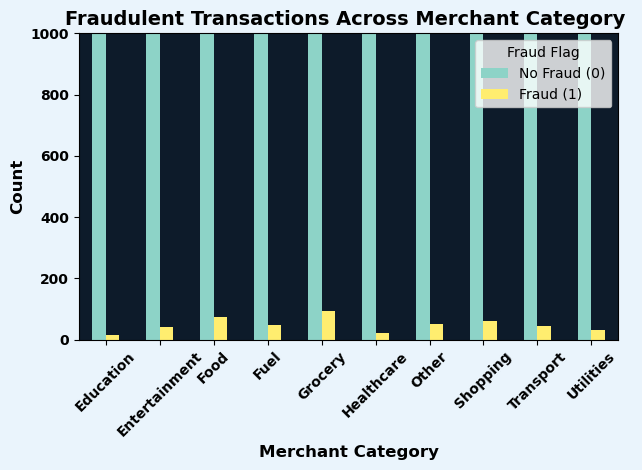

In [76]:
plt.figure(figsize=(8,5))

ct_merchant_fraud.plot(kind='bar', stacked=False, colormap='Set3')
plt.title("Fraudulent Transactions Across Merchant Category ", fontsize=14, fontweight='bold')
plt.xlabel("Merchant Category", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.legend(title="Fraud Flag", labels=['No Fraud (0)','Fraud (1)'])
plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.ylim(0, 1000)  
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")
plt.tight_layout()
plt.savefig("merchant_category_fraud.png", dpi=300, bbox_inches='tight')

### Most fraudulent activities are concentrated in the Grocery and Food categories, reflecting the high transaction volume in these sectors. In contrast, Education-related transactions see minimal fraud, likely due to their lower frequency and more structured payment patterns.

In [77]:
df['sender_age_group'].unique()

array(['26-35', '36-45', '46-55', '56+', '18-25'], dtype=object)

In [78]:
sender_age = df['sender_age_group'].value_counts()

In [79]:
sender_age

sender_age_group
26-35    87432
36-45    62873
18-25    62345
46-55    24841
56+      12509
Name: count, dtype: int64

In [80]:
receiver_age = df['receiver_age_group'].value_counts()

In [81]:
receiver_age

receiver_age_group
26-35    87864
18-25    62611
36-45    62151
46-55    24823
56+      12551
Name: count, dtype: int64

In [82]:
ct_sender_age = pd.crosstab(df['sender_age_group'], df['fraud_flag'])
ct_sender_age.to_csv('sen_age_group_fraud_table.csv', index = True)
ct_sender_age

fraud_flag,0,1
sender_age_group,,
18-25,62202,143
26-35,87269,163
36-45,62757,116
46-55,24810,31
56+,12482,27


In [83]:
ct_receiver_age = pd.crosstab(df['receiver_age_group'], df['fraud_flag'])
ct_receiver_age.to_csv('rec_age_group_fraud_table.csv', index = True)
ct_receiver_age

fraud_flag,0,1
receiver_age_group,,
18-25,62479,132
26-35,87716,148
36-45,62026,125
46-55,24766,57
56+,12533,18


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_37012\2771786301.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')
C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_37012\2771786301.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')


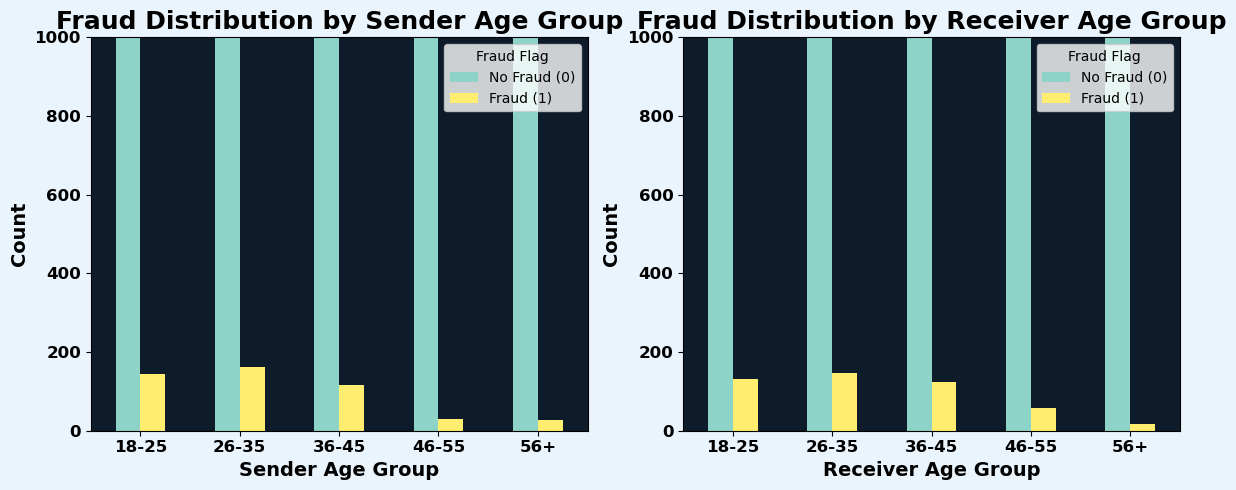

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Sender age group fraud distribution
ct_sender_age.plot(kind='bar', stacked=False, colormap='Set3', ax=ax1)

ax1.set_title("Fraud Distribution by Sender Age Group", fontsize=18, fontweight='bold')
ax1.set_xlabel("Sender Age Group", fontsize=14, fontweight='bold')
ax1.set_ylabel("Count", fontsize=14, fontweight='bold')
ax1.set_ylim(0, 1000)  # zoom to highlight frauds
ax1.legend(title="Fraud Flag", labels=['No Fraud (0)', 'Fraud (1)'])
ax1.set_facecolor("#0d1b2a")
fig.patch.set_facecolor("#eaf4fc")

# Receiver age group fraud distribution
ct_receiver_age.plot(kind='bar', stacked=False, colormap='Set3', ax=ax2)

ax2.set_title("Fraud Distribution by Receiver Age Group", fontsize=18, fontweight='bold')
ax2.set_xlabel("Receiver Age Group", fontsize=14, fontweight='bold')
ax2.set_ylabel("Count", fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1000)  # zoom to highlight frauds
ax2.legend(title="Fraud Flag", labels=['No Fraud (0)', 'Fraud (1)'])
ax2.set_facecolor("#0d1b2a")

for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=12, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_Age_Group')

### The 26–35 age group emerges as the hotspot for fraudulent transactions, while the older users remain largely unaffected, revealing a striking age-based pattern in transaction risks.

In [85]:
ct_fraud_state = pd.crosstab(df['sender_state'], df['fraud_flag'])
ct_fraud_state.to_csv('sender_state_fraud_table.csv', index = True)
ct_fraud_state

fraud_flag,0,1
sender_state,,
Andhra Pradesh,19971,35
Delhi,24820,50
Gujarat,20018,43
Karnataka,29687,69
Maharashtra,37356,71
Rajasthan,19935,46
Tamil Nadu,25327,40
Telangana,22396,39
Uttar Pradesh,30073,52


<Figure size 1200x600 with 0 Axes>

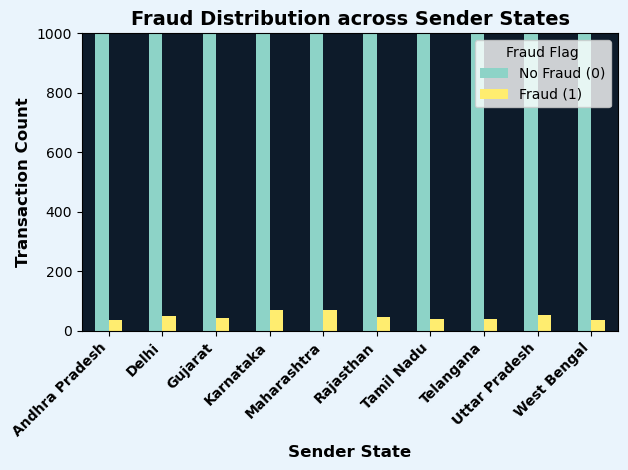

In [86]:
plt.figure(figsize=(12,6))
ct_fraud_state.plot(
    kind='bar',
    stacked=False,
    colormap = 'Set3'
)

plt.title("Fraud Distribution across Sender States", fontsize=14, fontweight="bold")
plt.xlabel("Sender State", fontsize=12, fontweight="bold")
plt.ylabel("Transaction Count", fontsize=12, fontweight="bold")
plt.ylim(0, 1000)

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')

plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.tight_layout()
plt.savefig('Fraud_distribution_across_sender_states')

### Most fraudulent transactions originated from Maharashtra and Karnataka, hinting that areas with heavy transaction traffic are more attractive targets for fraudsters. Keeping a closer eye on these high-activity states could help nip potential risks in the bud.

In [87]:
df['sender_bank'].unique()

array(['Axis', 'ICICI', 'Yes Bank', 'IndusInd', 'HDFC', 'Kotak', 'SBI',
       'PNB'], dtype=object)

In [88]:
sender_bank_counts = df['sender_bank'].value_counts()

In [89]:
sender_bank_counts

sender_bank
SBI         62693
HDFC        37485
ICICI       29769
IndusInd    25173
Axis        25042
PNB         24946
Yes Bank    24860
Kotak       20032
Name: count, dtype: int64

In [90]:
receiver_bank_counts = df['receiver_bank'].value_counts()

In [91]:
receiver_bank_counts

receiver_bank
SBI         62378
HDFC        37651
ICICI       29944
IndusInd    25086
Yes Bank    25009
Axis        24992
PNB         24802
Kotak       20138
Name: count, dtype: int64

In [92]:
ct_fraud_sender_bank = pd.crosstab(df['sender_bank'], df['fraud_flag'])
ct_fraud_sender_bank.to_csv('sender_bank_fraud_table.csv', index = True)
ct_fraud_sender_bank

fraud_flag,0,1
sender_bank,,
Axis,24993,49
HDFC,37423,62
ICICI,29703,66
IndusInd,25121,52
Kotak,19982,50
PNB,24894,52
SBI,62584,109
Yes Bank,24820,40


In [93]:
ct_fraud_receiver_bank = pd.crosstab(df['receiver_bank'], df['fraud_flag'])
ct_fraud_receiver_bank.to_csv('receiver_bank_fraud_table.csv', index = True)
ct_fraud_receiver_bank

fraud_flag,0,1
receiver_bank,,
Axis,24951,41
HDFC,37578,73
ICICI,29887,57
IndusInd,25034,52
Kotak,20097,41
PNB,24753,49
SBI,62262,116
Yes Bank,24958,51


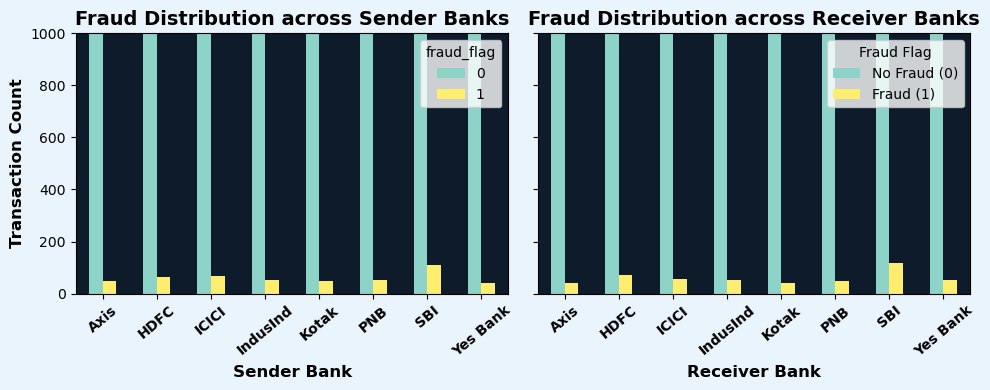

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# Sender Bank
ct_fraud_sender_bank.plot(
    kind='bar',
    stacked=False,
    colormap = 'Set3',
    ax=ax1
)
ax1.set_title("Fraud Distribution across Sender Banks", fontsize=14, fontweight='bold')
ax1.set_xlabel("Sender Bank", fontsize=12, fontweight='bold')
ax1.set_ylabel("Transaction Count", fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1000)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, fontsize=10, fontweight='bold')
ax1.set_facecolor("#0d1b2a")

# Receiver Bank
ct_fraud_receiver_bank.plot(
    kind='bar',
    stacked=False,
    colormap = 'Set3',
    ax=ax2
)
ax2.set_title("Fraud Distribution across Receiver Banks", fontsize=14, fontweight='bold')
ax2.set_xlabel("Receiver Bank", fontsize=12, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, fontsize=10, fontweight='bold')
ax2.set_facecolor("#0d1b2a")

# Figure background
fig.patch.set_facecolor("#eaf4fc")
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.tight_layout()
plt.savefig('Fraud_Distribution_Across_Banks')

### SBI stands out as the bank with the highest number of fraudulent transactions on both the sender and receiver sides. This highlights that high-volume banks are more prone to fraud attempts, emphasizing the need for robust monitoring and preventive measures at every transaction stage.

In [95]:
upi_counts = df['upi_app'].value_counts()

In [96]:
upi_counts

upi_app
Paytm      87553
PhonePe    62527
PayPal     50119
GPay       49801
Name: count, dtype: int64

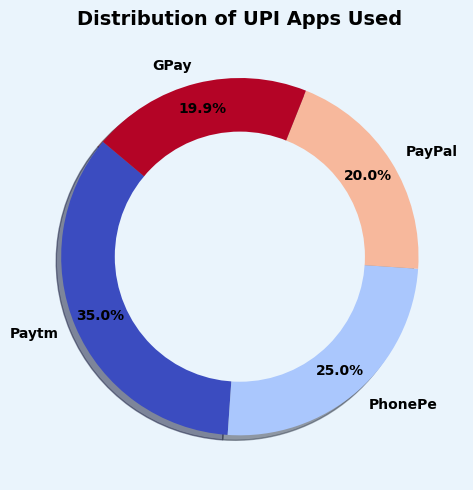

In [97]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

wedges, texts, autotexts = ax.pie(
    upi_counts,
    labels=upi_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,  
    shadow=True,       
    colors = plt.cm.coolwarm(np.linspace(0,1,len(upi_counts)))
)

centre_circle = plt.Circle((0,0),0.70,fc='#eaf4fc')
fig.gca().add_artist(centre_circle)
plt.title("Distribution of UPI Apps Used", fontsize=14, fontweight="bold")

for text in texts:
    text.set_fontweight("bold")
for autotext in autotexts:
    autotext.set_fontweight("bold")

plt.tight_layout()
plt.savefig('Distribution_of_UPI_Apps')

In [98]:
ct_upi = pd.crosstab(df['upi_app'], df['fraud_flag'])
ct_upi.to_csv('upi_fraud_table.csv', index = True)
ct_upi

fraud_flag,0,1
upi_app,,
GPay,49685,116
PayPal,50015,104
Paytm,87404,149
PhonePe,62416,111


<Figure size 500x400 with 0 Axes>

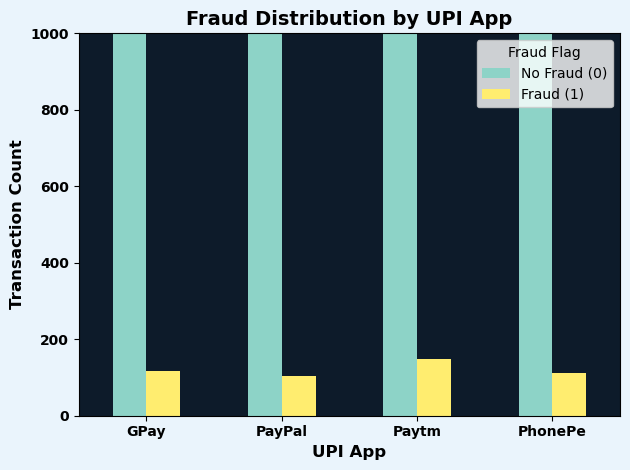

In [99]:
plt.figure(figsize=(5,4))
ct_upi.plot(kind='bar', stacked=False, colormap='Set3')

plt.title("Fraud Distribution by UPI App", fontsize=14, fontweight='bold')
plt.xlabel("UPI App", fontsize=12, fontweight='bold')
plt.ylabel("Transaction Count", fontsize=12, fontweight='bold')
plt.ylim(0, 1000)  # zoom for fraud visibility
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_UPI_App')

### Analyzing UPI apps reveals that Paytm accounts for the highest number of fraudulent transactions. This suggests that fraudsters may be targeting apps with a larger user base or higher transaction volume, underlining the importance of enhanced security measures on such platforms.”

In [100]:
ct_device = pd.crosstab(df['device_type'], df['fraud_flag'])
ct_device.to_csv('device_fraud_table.csv', index = True)
ct_device

fraud_flag,0,1
device_type,,
Android,187413,364
Web,12584,26
iOS,49523,90


<Figure size 800x500 with 0 Axes>

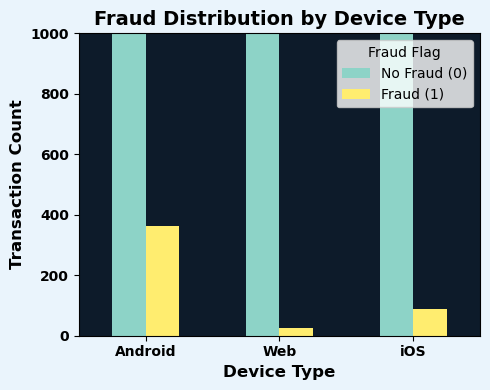

In [101]:
plt.figure(figsize=(8,5))
ct_device.plot(kind='bar', stacked=False, colormap="Set3", figsize=(5,4))

plt.title("Fraud Distribution by Device Type", fontsize=14, fontweight='bold')
plt.xlabel("Device Type", fontsize=12, fontweight='bold')
plt.ylabel("Transaction Count", fontsize=12, fontweight='bold')
plt.ylim(0, 1000)  # zoomed for visibility of fraud cases
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.xticks(rotation = 0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_Device_Type')

### Examining device types shows that Android devices experience the highest number of fraudulent transactions, while web-based transactions are the least affected. This highlights a potential vulnerability in mobile platforms and emphasizes the need for stronger security protocols on Android apps

In [102]:
failures = df[df['transaction_status'].str.strip() == 'FAILED']
failures.head(2)

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,upi_app
60,P2P,Shopping,159,FAILED,56+,36-45,Tamil Nadu,SBI,PNB,Android,5G,0,21,Wednesday,0,Paytm
67,P2M,Shopping,221,FAILED,46-55,26-35,Delhi,HDFC,IndusInd,iOS,5G,0,19,Wednesday,0,PhonePe


In [103]:
device_failure_pct = (failures['device_type'].value_counts(normalize=True) * 100)
device_failure_pct

device_type
Android    74.967679
iOS        19.780220
Web         5.252101
Name: proportion, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_37012\3038669454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


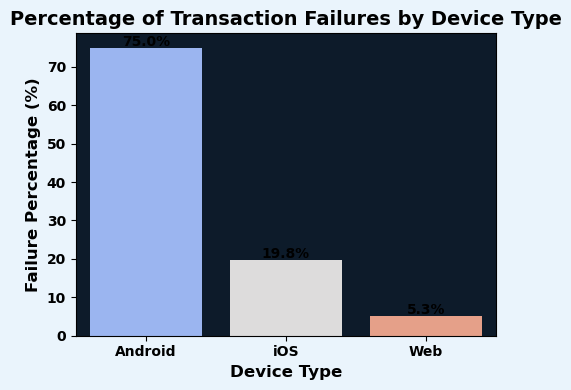

In [104]:
plt.figure(figsize=(5,4))
sns.barplot(
    x=device_failure_pct.index,
    y=device_failure_pct.values,
    palette="coolwarm"
)

plt.title("Percentage of Transaction Failures by Device Type", fontsize=14, fontweight='bold')
plt.xlabel("Device Type", fontsize=12, fontweight='bold')
plt.ylabel("Failure Percentage (%)", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

for i, v in enumerate(device_failure_pct.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.show()

### Diving into transaction failures by device type, Android stands out with the highest failure rates, while web transactions sail through almost flawlessly. This trend could partly be because Android dominates the user base, and web transactions are comparatively few.

In [105]:
ct_network = pd.crosstab(df['network_type'], df['fraud_flag'])
ct_network.to_csv('network_fraud_table.csv', index = True)
ct_network

fraud_flag,0,1
network_type,,
3G,12447,24
4G,149531,282
5G,62467,115
WiFi,25075,59


<Figure size 400x300 with 0 Axes>

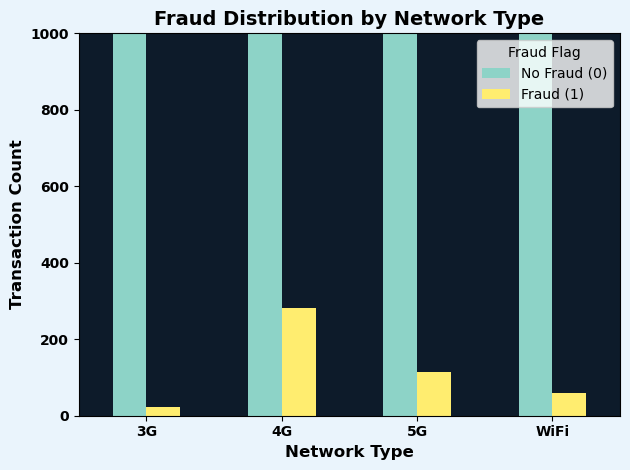

In [106]:
plt.figure(figsize=(4,3))
ct_network.plot(kind='bar', stacked=False, colormap="Set3")

plt.title("Fraud Distribution by Network Type", fontsize=14, fontweight='bold')
plt.xlabel("Network Type", fontsize=12, fontweight='bold')
plt.ylabel("Transaction Count", fontsize=12, fontweight='bold')
plt.ylim(0, 1000)  # zoom for fraud visibility
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().patch.set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Fraud_Distribution_by_Network_Type')

### Examining fraud across network types, 4G connections account for the majority of fraudulent transactions, while 3G networks see the fewest. This pattern likely reflects the larger volume of 4G users and higher transaction activity on faster networks, underlining how user adoption and network speed can influence risk exposure.

In [107]:
failures = df[df['transaction_status'] == 'FAILED']['network_type'].value_counts()
failures

network_type
4G      7464
5G      3039
WiFi    1222
3G       651
Name: count, dtype: int64

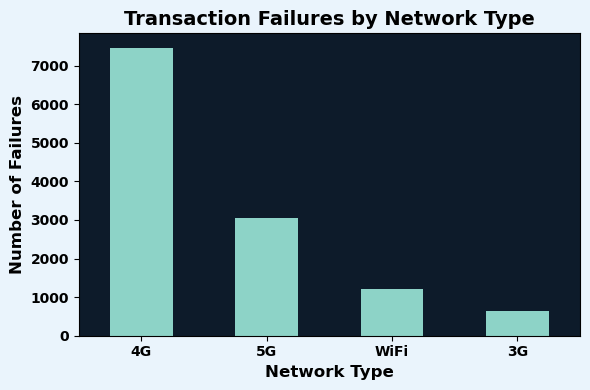

In [108]:
failures.plot(kind='bar', figsize=(6,4), colormap='Set3')

plt.title("Transaction Failures by Network Type", fontsize=14, fontweight='bold')
plt.xlabel("Network Type", fontsize=12, fontweight='bold')
plt.ylabel("Number of Failures", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Transaction_Failures_by_Network_Type')

### Looking at transaction failures across network types, 4G networks experience the highest number of failed transactions, whereas 3G networks see the fewest. This trend likely mirrors user distribution, as 4G networks host more users and higher transaction volumes, making failures more prominent compared to the less frequently used 3G connections.

In [109]:
df['amount (INR)'].unique()

array([  868,  1011,   477, ..., 14456, 11576,  9505], shape=(10355,))

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_37012\1254448860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fraud_flag", y="amount (INR)", palette="coolwarm")


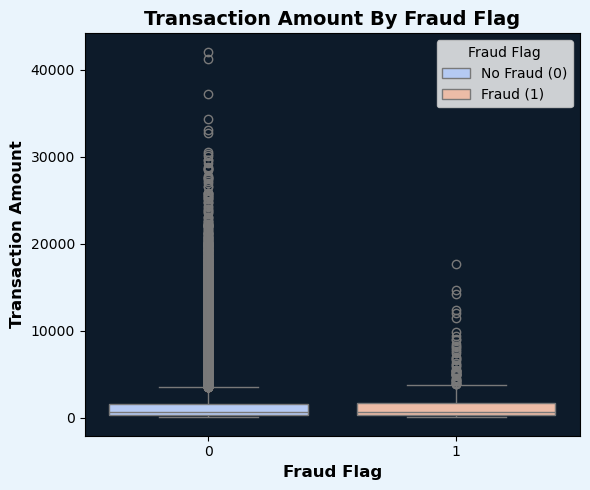

In [110]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="fraud_flag", y="amount (INR)", palette="coolwarm")

plt.title("Transaction Amount By Fraud Flag", fontsize=14, fontweight="bold")
plt.xlabel("Fraud Flag", fontsize=12, fontweight="bold")
plt.ylabel("Transaction Amount", fontsize=12, fontweight="bold")
plt.legend(title="Fraud Flag", labels=["No Fraud (0)", "Fraud (1)"])
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")
plt.tight_layout()
plt.savefig('Transaction_amount_by_fraud_flag_boxplot')

###  Most non-fraud transactions have outliers between ₹2,000–₹30,000, while fraudulent transactions are mostly below ₹10,000. This suggests that fraud tends to occur in lower to mid-value transactions rather than high-value ones.

In [111]:
fraud_data = df[df['fraud_flag'] == 1]

In [112]:
# Amount ko bins me group karo
bins = [0, 500, 1000, 5000, 10000, 50000, 100000]
fraud_bins = pd.cut(fraud_data['amount (INR)'], bins=bins)
fraud_counts = fraud_bins.value_counts().sort_index()

In [113]:
median_amount = fraud_data['amount (INR)'].median()
mode_amount = fraud_data['amount (INR)'].mode()[0]

print("Fraud Transactions Median Amount:", median_amount)
print("Fraud Transactions Mode Amount:", mode_amount)

Fraud Transactions Median Amount: 618.5
Fraud Transactions Mode Amount: 162


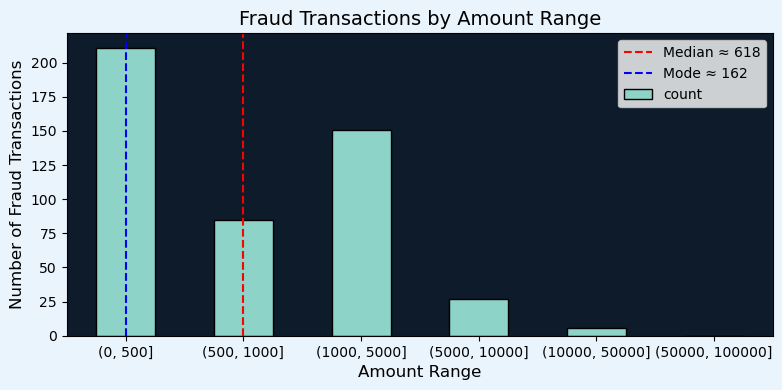

In [114]:
plt.figure(figsize=(8,4))
fraud_counts.plot(kind='bar', colormap="Set3", edgecolor="black")

# Median aur Mode ko line ke form me dikhana
plt.axvline(
    x=np.digitize(median_amount, bins)-1, 
    color='red', linestyle='--', label=f'Median ≈ {median_amount:.0f}'
)
plt.axvline(
    x=np.digitize(mode_amount, bins)-1, 
    color='blue', linestyle='--', label=f'Mode ≈ {mode_amount:.0f}'
)

plt.title("Fraud Transactions by Amount Range", fontsize=14)
plt.xlabel("Amount Range", fontsize=12)
plt.ylabel("Number of Fraud Transactions", fontsize=12)
plt.xticks(rotation=0)
plt.legend()
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")
plt.tight_layout()
plt.savefig('Fraud_Transaction_by_Amount_range')

### Fraudulent transactions cluster at lower amounts, with a median of ₹618 and a mode of ₹162. The mode indicates that the most frequent frauds occur around ₹162, while the median shows that half of all frauds are below ₹618. The highest number of frauds occur in the ₹0–₹500 range (~200 transactions), and the vast majority remain below ₹5,000, highlighting that small-value transactions are most targeted.

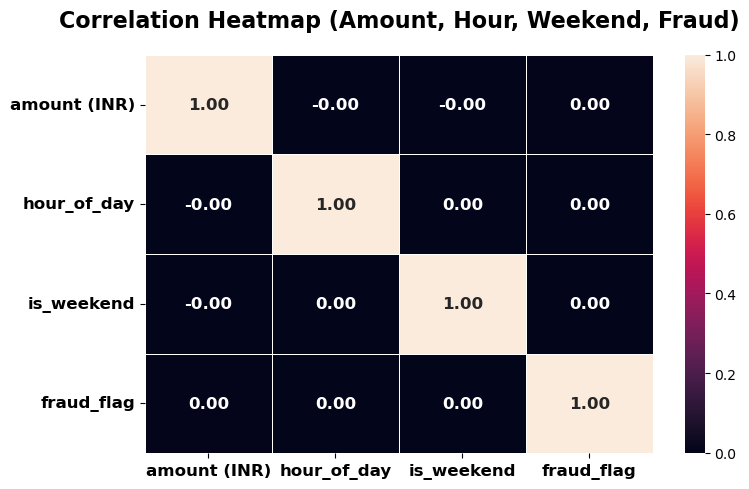

In [115]:
# Numeric columns for correlation
num_cols = ['amount (INR)', 'hour_of_day', 'is_weekend', 'fraud_flag']

# Correlation matrix
corr = df[num_cols].corr()

# Plot
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f", cbar=True,
            annot_kws={"size":12, "weight":"bold"}, linewidths=0.5, linecolor="white")

plt.title("Correlation Heatmap (Amount, Hour, Weekend, Fraud)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=0, weight="bold")
plt.yticks(fontsize=12, rotation=0, weight="bold")
plt.tight_layout()
plt.savefig('Correlation_Heatmap_NUM_Features')

### The correlation heatmap highlights that higher transaction amounts are less common during late hours and weekends (negative correlation). However, frauds show a positive association with both hour of day and weekends, indicating fraudsters often target specific times. Moreover, fraud transactions are positively linked with higher amounts, suggesting that while big-value transactions are rarer, they remain attractive to fraudsters.

In [116]:
# Grouping by sender_bank, merchant_category, upi_app and fraud_flag
fraud_combined = (
    df.groupby(['sender_bank', 'merchant_category', 'upi_app', 'fraud_flag'])
    .size()
    .reset_index(name='count'))

In [117]:
# To see only fraud cases (fraud_flag == 1)
fraud_only = fraud_combined[fraud_combined['fraud_flag'] == 1]
fraud_only.head()

,sender_bank,merchant_category,upi_app,fraud_flag,count
1,Axis,Education,PhonePe,1,3
3,Axis,Entertainment,PhonePe,1,2
5,Axis,Food,PhonePe,1,6
7,Axis,Fuel,PhonePe,1,5
9,Axis,Grocery,PhonePe,1,9


In [118]:
# Sort to find top fraud patterns
fraud_only = fraud_only.sort_values(by="count", ascending=False)

In [119]:
top_10 = fraud_only.head(10)  
top_10

,sender_bank,merchant_category,upi_app,fraud_flag,count
127,SBI,Grocery,Paytm,1,28
48,ICICI,Grocery,GPay,1,14
131,SBI,Other,Paytm,1,13
125,SBI,Fuel,Paytm,1,13
123,SBI,Food,Paytm,1,12
24,HDFC,Food,PhonePe,1,11
107,PNB,Grocery,PayPal,1,11
135,SBI,Transport,Paytm,1,11
87,Kotak,Grocery,GPay,1,11
64,IndusInd,Food,PayPal,1,10


### Looking across merchant categories, grocery stands out with the highest number of fraudulent transactions, and notably, SBI emerges as the sender bank with the most frauds. This suggests that everyday high-volume transactions, especially from certain banks, are prime targets for fraudulent activity, highlighting areas for focused monitoring.

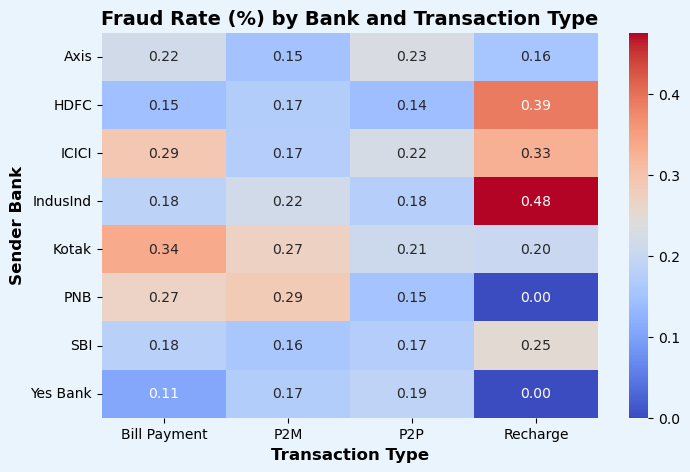

In [120]:
# Fraud rate calculation
fraud_rate = df.groupby(['sender_bank','transaction type'])['fraud_flag'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(8,5))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")
sns.heatmap(fraud_rate*100, annot=True, fmt=".2f", cmap = 'coolwarm')

plt.title("Fraud Rate (%) by Bank and Transaction Type", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Type", fontsize=12, fontweight="bold")
plt.ylabel("Sender Bank", fontsize=12, fontweight="bold")

plt.savefig('Fraud_Rate_by_Bank_and_Transaction_Type')

### Exploring the heatmap of sender banks versus transaction types reveals that IndusInd Bank shows the highest positive correlation with recharge transactions, indicating a notably higher fraud percentage in this category. Interestingly, SBI Bank does not exhibit strong correlations with any transaction type, suggesting that fraud rates are more evenly distributed across its transactions.

---

# Conclusion:

### The analysis of 250,000 UPI transactions provides a comprehensive view of user behavior, transaction patterns, and fraud occurrences across multiple dimensions. Overall, the system shows a high success rate, with 95% of transactions completing successfully, while only a small fraction—around 0.2%—were identified as fraudulent, highlighting the highly imbalanced nature of fraud occurrences.A closer look at transaction types reveals that P2P transactions dominate the volume, while recharge transactions are fewer. Interestingly, while P2P transactions had the highest fraud counts, the fraud rate percentage peaks in recharge transactions, emphasizing that volume alone does not indicate risk. Merchant categories such as Grocery and Food see the highest transaction volume and fraud counts, whereas categories like Education remain relatively safe.

### Demographically, the 26–35 age group experiences the highest number of frauds, suggesting that fraudsters may target the most active user segment, while older age groups face comparatively fewer incidents. Regional patterns indicate Maharashtra and Karnataka as hotspots for fraudulent transactions, and SBI bank consistently appears as the sender and receiver bank with the highest fraud counts. Among UPI apps, Paytm shows the highest fraud count, highlighting potential areas for monitoring.

### Device and network analysis provides further insight: Android devices and 4G networks account for most fraudulent and failed transactions, likely due to their dominant usage among users, whereas Web and 3G transactions remain minimal in both volume and risk. Transaction timing also plays a role: most transactions occur between 3 PM and midnight, with fraud percentages peaking around late hours. Amount analysis shows that most frauds happen in the lower transaction ranges, below ₹5,000, with the median fraud amount at ₹618 and the mode at ₹162, suggesting small-value transactions are frequently exploited. Correlation analysis reinforces these patterns, showing positive relationships between fraud, weekend usage, and active hours, while amounts negatively correlate with both time and weekend activity.

### Finally, cross-dimensional analysis combining sender bank, merchant category, and transaction type shows that frauds are most concentrated in specific combinations, emphasizing the need for targeted monitoring.

---

# Recommendation and Business Insights:

## Transaction Type (P2P & Recharge):
### P2P transactions account for the highest number of frauds, whereas recharge transactions show the highest fraud percentage despite lower counts. This suggests monitoring strategies should differ: P2P could benefit from stronger verification for large-value or frequent transfers, while recharge transactions might require stricter OTP or real-time anomaly checks to catch high-percentage frauds early.

## Age Groups:
### The 26–35 age group experiences the highest fraud incidence, while older users are relatively safer. Targeted awareness campaigns, timely security alerts, and stronger authentication for this age bracket could help minimize risks.

## Regional Insights (Sender State):
###  Maharashtra and Karnataka have the most reported fraud cases. Banks and payment providers might implement region-specific monitoring, strengthen transaction alerts, and educate users in these hotspots about secure payment practices.

## Banks (SBI):
### SBI is consistently involved in the majority of fraud cases, both as sender and receiver bank. Collaborative fraud-detection protocols and cross-bank alerts could help mitigate risks, especially for high-risk institutions.

## UPI Apps (Paytm, PhonePe, GPay):
### Paytm shows the highest fraud counts, indicating platform-specific vulnerabilities. Focused app-level security updates, real-time monitoring, and anomaly detection for high-traffic apps could reduce fraud exposure.

## Device & Network Type:
### Most frauds and transaction failures occur on Android devices and 4G networks, likely due to their large user base. Adaptive security checks, app optimization, and network-aware verification could significantly improve transaction reliability.

## Timing & Amount:
### Fraud incidents peak during specific hours and mostly involve transactions below ₹5,000. Introducing time-sensitive alerts, enhanced verification during peak hours, and anomaly detection for low-value transactions could effectively reduce fraud occurrence.

## Merchant Categories:
### Grocery and food categories witness the highest fraud counts. Merchants in high-risk categories could implement stricter checks for large or unusual transactions to safeguard revenue and customers.

---

# This project analyzes 2.5 lakh UPI transactions to uncover patterns in fraud, transaction failures, and user behavior, providing actionable insights for payment platforms. The findings highlight key risk areas across transaction types, banks, and user segments, enabling businesses to optimize security measures, reduce losses, and enhance customer trust in digital payments.

---